In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Base de datos original:

dataset=pd.read_csv("../datos/CO2.csv", skiprows=3)
dataset


In [ ]:
#Se eliminan las columnas con datos que no nos sirven
dataset.drop(columns=dataset.columns[1:4], axis=1, inplace=True)

#Se eliminan los años en los que la columna entera es NaN
dataset.dropna(how="all", axis=1, inplace=True)
dataset

In [ ]:
#Se eliminan los paises en los que todas sus muestras fueron NaN
condicion = (dataset.iloc[:, 0].notna()) & (dataset.iloc[:, 1:].isna().all(axis=1))
dataset = dataset[~condicion]

#Se eliminan los paises que tienen de nombre NaN
condicion2 = (dataset.iloc[:, 0].isna())
dataset = dataset[~condicion2]
dataset
dataset.loc(0)

<h1>Muestra</h1>

In [15]:

#Se guardan solo las muestras (CO2 y los años), y los nombres de cada pais se guarda en una lista a parte
nombres_paises= list(dataset[:]["Country Name"])
muestra=dataset.loc[:, "1990":]

#Se saca la transpuesta de la matriz guardada para graficar
muestra= muestra.T

#A las nuevas columnas se les cambia el nombre por la lista de nombres guardados anteriormente
muestra.columns=nombres_paises
muestra


,Afganistán,Angola,Albania,Andorra,El mundo árabe,Emiratos Árabes Unidos,Argentina,Armenia,Antigua y Barbuda,Australia,...,San Vicente y las Granadinas,Venezuela,Viet Nam,Vanuatu,Mundo,Samoa,"Yemen, Rep. del",Sudáfrica,Zambia,Zimbabwe
1990,2046.870,6564.20,6060.50,406.704000,632472.870,55210.4,100313.9,19845.20,218.2,263437.5,...,82.6,101630.0,19327.9,66.9,21284042.79,89.0,6642.3,247614.7,2740.80,16535.5
1991,1941.370,6674.50,4119.60,406.704000,634670.889,61564.1,105906.6,20689.60,221.4,264709.7,...,89.1,100992.8,19796.6,66.9,21440490.20,97.7,8498.5,242286.0,2876.20,18301.0
1992,1525.470,6877.30,2239.30,406.704000,688969.380,59702.8,107921.1,10755.96,218.5,268366.5,...,89.2,103107.8,20812.9,63.7,21390040.84,102.9,9130.0,238780.6,2848.00,18469.6
1993,1527.890,9269.70,2078.40,410.368000,741817.840,63620.2,110256.5,4974.49,222.0,273016.9,...,108.9,107387.9,24244.9,63.7,21531833.41,112.5,8552.3,246445.9,2514.40,17075.6
1994,1493.590,11298.23,2084.70,406.704000,786209.540,70779.6,111909.9,2707.87,225.2,280096.3,...,122.3,106529.1,26682.3,63.6,21676894.94,103.4,9339.6,252088.5,2143.80,15960.5
1995,1457.690,12719.48,1951.10,425.024000,810180.270,75166.7,112886.7,3436.76,235.2,290141.5,...,132.2,114036.6,31401.0,66.8,22299203.28,116.6,10531.7,264251.5,2129.50,15483.6
1996,1407.300,15442.40,1968.00,454.336000,838864.280,78528.3,122545.9,2481.91,254.8,300180.4,...,135.4,121835.4,35033.5,85.6,22778983.29,131.5,10799.1,274043.7,1761.90,14862.0
1997,1344.100,16154.90,1479.16,465.328000,879771.680,81440.9,126118.7,3324.30,267.6,307778.5,...,142.1,127590.1,40842.9,89.0,23202623.39,129.1,11640.7,288584.8,2285.50,13826.1
1998,1318.000,16767.90,1804.55,490.976000,884602.460,83449.6,132669.9,3492.50,286.0,327536.9,...,171.2,129300.3,45473.9,82.8,23365547.83,146.1,12455.4,296196.9,2173.00,14073.1
1999,1122.000,17613.22,2985.35,512.960000,896523.300,85679.8,134502.0,3103.00,299.3,333677.7,...,173.1,125458.8,46412.8,89.4,23530421.41,145.1,14059.0,278270.9,1764.00,15818.1


In [ ]:

#Grafica con Pal de Chicle :p

sb.lineplot(muestra, legend=False)


<h1>AutoRegressive Model Example</h1>

In [ ]:
#Autoregressive models are often used in time series analysis
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate some example time series data
np.random.seed(42)
n_obs = 100
X = np.linspace(0, 10, n_obs)
y = 2 * X + 1 + np.random.normal(scale=2, size=n_obs)

# Create lag features for autoregressive model
lag_order = 1
X_lagged = np.column_stack([np.roll(y, i) for i in range(1, lag_order + 1)])
X_lagged = sm.add_constant(X_lagged[lag_order:])

# Fit autoregressive model
model = sm.OLS(y[lag_order:], X_lagged)
results = model.fit()

# Print the model summary
print(results.summary())

# Plot the original and predicted time series
plt.plot(X, y, label='Original')
plt.plot(X[lag_order:], results.fittedvalues, label='Predicted')
plt.legend()
plt.show()
#Remember to check the documentation of the libraries you are using for the most up-to-date and accurate information.







<h1>AR Model 1</h1>
<h3>Definir gráfica original</h3>

In [ ]:
value_col = muestra.loc[:, "Andorra"]    # Tomar valores de la columna asignada
#value_col = muestra.loc[:, "Angola"]
nameModel = value_col.name      # Nombre de la columna
X = value_col.index     # Eje X = periodo de tiempo
Y = value_col.values    # Eje Y = Cantidad KT CO2

# Convert timestamp to datetime format (if needed)
X = pd.to_datetime(X)
value_col
plt.plot(X, Y, label=nameModel)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# Split the data into training and testing sets
train_size = int(0.8 * len(value_col))
train, test = value_col[:train_size], value_col[train_size:]
## A train le toca desde [train_size -> n]
## A test le toca desde [0 -> train_size]

# Fit autoregressive model
X_train = sm.add_constant(train)
y_train = train

model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the model summary
print(results.summary())

# Predict on the test set
X_test = sm.add_constant(test)
y_pred = results.predict(X_test)

# Plot the original time series
plt.plot(X, Y, label=nameModel)
plt.plot(test, y_pred, label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

<h1>ARIMA</h1>

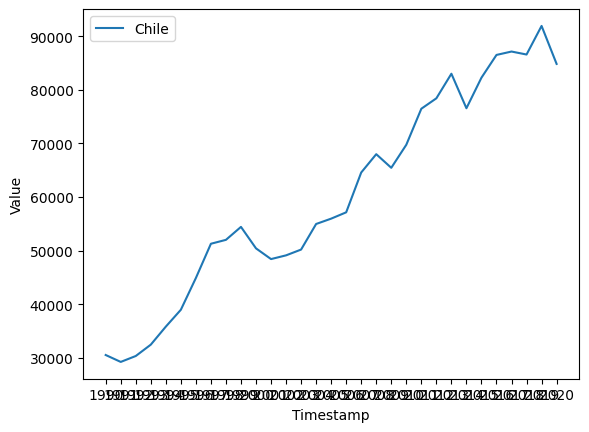

C:\Users\ariel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ariel\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:                 ARIMA(2, 6, 2)   Log Likelihood                -266.145
Date:                Wed, 15 Nov 2023   AIC                            542.290
Time:                        16:40:07   BIC                            548.385
Sample:                             0   HQIC                           543.980
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1742      0.188     -6.237      0.000      -1.543      -0.805
ar.L2         -0.6449      0.212     -3.037      0.002      -1.061      -0.229
ma.L1         -1.9605      0.303     -6.477      0.0

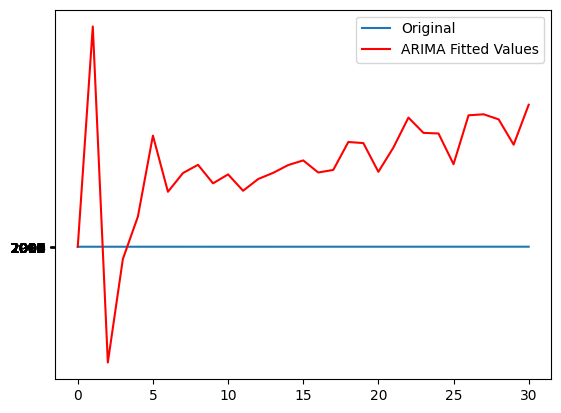

In [26]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

muestra
value_col = muestra.loc[:, "Chile"]    # Tomar valores de la columna asignada
#value_col = muestra.loc[:, "Angola"]
nameModel = value_col.name      # Nombre de la columna
X = value_col.index     # Eje X = periodo de tiempo
Y = value_col.values    # Eje Y = Cantidad KT CO2

# Convert timestamp to datetime format (if needed)
#X = pd.to_datetime(X)
#value_col
plt.plot(X, Y, label=nameModel)
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

# Assuming you have a time series data in a pandas DataFrame called 'data'
# with a column named 'value' representing the time series values.
# For example:
# data = pd.read_csv('your_data.csv')
# time_series = data['value']

# Fit an ARIMA model
p=2
d=6
q=2
model = ARIMA(Y, order=(p,d,q))
results = model.fit()

# Print the model summary
print(results.summary())

# Plot the original time series and the fitted values
plt.plot(X, label='Original')
plt.plot(results.fittedvalues, color='red', label='ARIMA Fitted Values')
plt.legend()
plt.show()

C:\Users\ariel\AppData\Local\Temp\ipykernel_5108\2102414229.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Puedes ajustar el ángulo de rotación según tus necesidades


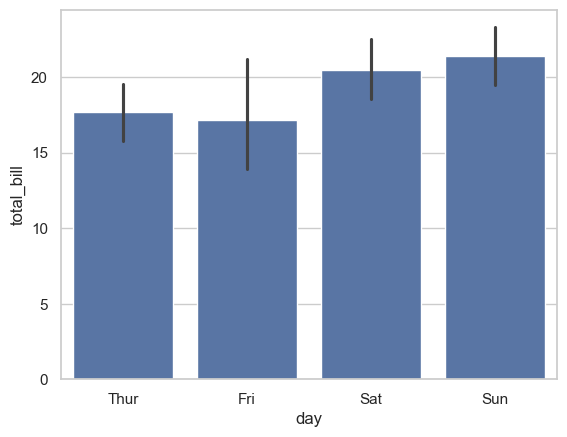

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un ejemplo de gráfico con seaborn
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

# Cambiar la orientación de las etiquetas del eje x a vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # Puedes ajustar el ángulo de rotación según tus necesidades

# Mostrar el gráfico
plt.show()